# Simulation du jeux de LIDO simplifié

## Principe
On considére un jeux de Lido simple:
on dispose d'un un seul pion.

- Etape 0 :
Le pion doit sort de sa prison lorsqu'on obtient un 6.

- Etape 1 :
Le pion doit atteindre exactement une position cible situé à N pas de distance de sa prison 

Soit $X_n$ la variable aléatoire qui represente le nombre de coup nécéssaire pour atteindre la positions cible.

**Objectif 1** : Simuler le jeux 

**Objectif 2** : Calculer une estimation de l'éspérance mathématique de $X_n$ en utilisant `python`

**Objéctif 3** : Observer la variation de $\mathbb{E}(X_n)$ en fonction de $n$

<img src="LIDO.png">


In [1]:
import numpy as np

### Simulation du lancé de dé

In [2]:
def Roll():
    return int(np.random.choice(range(1,7),1))

In [3]:
Roll()

1

### Compléter le code et commenter

In [8]:
def sim(S):
    A=0
    NA=0
    temp=Roll()
    NA=1
    while (temp<6) :
        NA=NA+1
        temp=Roll()
        #print(temp,NA,A)
    A=1
    #print(temp,NA,A)
    while A!=S:
        temp=Roll()
        NA=NA+1
        #print(temp,NA,A)
        if A+temp<S:
            A=A+temp
            #print(temp,NA,A)
        elif A+temp==S:
            A=S
            #print(temp,NA,A)
    return NA

In [10]:
sim(20)

11

### Simulation
Ecrire une foction `sim` qui simule le jeux et qui prend comme variable le nombre de pas $n$ nécessazire pour atteindre la cible

### Simulation de $10^5$  scénario 

In [11]:
Freq=np.fromiter((sim(20) for i in range(10**4)),dtype=int)

In [12]:
ESP=Freq.sum()/10**5
ESP

In [13]:
x=list(range(10,20))

In [14]:
y=[np.fromiter((sim(u) for i in range(5*10**4)),dtype=int).sum()/10000 for u in x]

In [16]:
import matplotlib.pyplot as plt

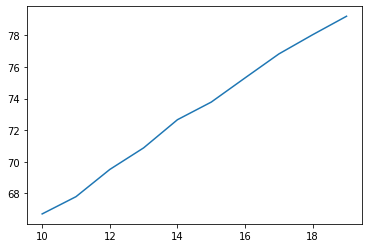

In [21]:
plt.plot(x,y)

In [22]:
from scipy import stats
import numpy as np
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)

In [23]:
slope

1.4279193939393933

In [24]:
intercept


52.36799878787879

In [25]:
yy=[slope*u+intercept for u in x]

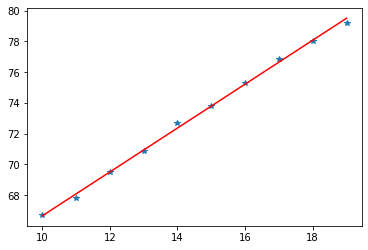

In [26]:
plt.plot(x,y,'*',x,yy,'r-')